In [1]:
pwd

'C:\\Users\\Henry\\Code'

In [2]:
from itertools import zip_longest
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import csv
import pandas as pd
import numpy as np

In [3]:
data = open ('BTCUSDT-1m-data.csv',encoding = 'utf-8')

csv_data = csv.reader(data)

Doc= list (csv_data)

# 1) opens the file 
# 2) translates the csv
# 3) translates csv into list of lists

In [4]:
print(Doc[0])

['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore']


In [5]:
# create time from len Doc:
time_cleaned =list(range(1,len(Doc)))    

In [6]:
date=[]
minutes=[]
date_and_minute_paired_list= []

for row in Doc[1:]:
    date_and_minute_paired_list.append(row[0].split(' '))

for row in date_and_minute_paired_list:
    date.append(row[0])
    minutes.append(row[1])

In [7]:
# Large data set prices are given to us as strings but we want float so we must clean data:
large_data_set_cleaned =[]    

for row in Doc[1:]:
        large_data_set_cleaned.append(float(row[1]))

In [8]:
# Define the Sample data:

sample_start = 630227
sample_finish = 631325
sample_length= (sample_finish-sample_start)

#  TODAY'S FORECAST:
# 
#present_time = time_cleaned[-1] 
#a_day_before_present_time = present_time - (1*60*24)
#sample_start = a_day_before_present_time
#sample_finish = present_time
#sample_length= (sample_finish-sample_start)
# Sample prices are given to us as strings but we want float so we must clean data:
sample_cleaned = []

for row in Doc[sample_start:sample_finish]:
    sample_cleaned.append(float(row[4]))
    
sample_length

1098

In [9]:
# PERFORMING CORRELATION CALCULATION ITERATION with our sample_cleaned

large_data_set_cleaned
window_size = sample_length

i = 0
moving_correlation=[]
while i <len(large_data_set_cleaned) -window_size +1:
    this_window = large_data_set_cleaned[i : i + window_size]
    
    window_correlation= correlation, p_value = stats.pearsonr(this_window, sample_cleaned)
    moving_correlation.append(window_correlation)
    i += 1
    
# output (moving_correlation) appears to be a list of tuples?? with 2 elements inside the tuple? I was expecting one list of single floats??
# after checking the numbers I found that we only need the 1st number as it matches with the csv figures!

In [10]:
correlations = []

for item in moving_correlation:
    correlations.append(item[0])
# we have extracted the first number in the tuples to lists

In [11]:
pd.set_option("display.max_rows", 20)

initial_df = pd.DataFrame(time_cleaned,columns = ["Time Index"])
initial_df = initial_df.set_index('Time Index')
initial_df["Date"]= date
initial_df["Minute "]= minutes
initial_df["Close Price "]= large_data_set_cleaned

barry =[0] * (sample_length-1)
barry.extend(correlations)
initial_df["Correlation"]= barry

initial_df

,Date,Minute,Close Price,Correlation
Time Index,,,,
1,2017-08-17,04:00:00,4261.48,0.000000
2,2017-08-17,04:01:00,4261.48,0.000000
3,2017-08-17,04:02:00,4280.56,0.000000
4,2017-08-17,04:03:00,4261.48,0.000000
5,2017-08-17,04:04:00,4261.48,0.000000
...,...,...,...,...
1980133,2021-05-28,20:33:00,35867.80,-0.345535
1980134,2021-05-28,20:34:00,35655.88,-0.346005
1980135,2021-05-28,20:35:00,35494.46,-0.347062


In [12]:
initial_df.Correlation = initial_df.Correlation.astype(float)
initial_sorted_df = initial_df.sort_values(['Correlation'], ascending=[False])
initial_sorted_df

,Date,Minute,Close Price,Correlation
Time Index,,,,
631325,2018-11-01,09:36:00,6375.95,0.994045
631324,2018-11-01,09:35:00,6375.40,0.980700
631326,2018-11-01,09:37:00,6374.84,0.980022
631323,2018-11-01,09:34:00,6375.02,0.965858
631327,2018-11-01,09:38:00,6373.34,0.962629
...,...,...,...,...
1429598,2020-05-10,18:05:00,8534.83,-0.793771
747301,2019-01-21,05:32:00,3519.45,-0.794248
747302,2019-01-21,05:33:00,3518.96,-0.795499


In [13]:
# create the dictionary for {time_cleaned : [date,minute]}

date_and_minute_dictionary=dict(zip_longest(time_cleaned, date_and_minute_paired_list))
date_and_minute_dictionary
date_and_minute_dictionary[631325]

['2018-11-01', '09:36:00']

In [14]:
# TIME + DATE DICTIONARY
time_and_date_dictionary=dict(zip_longest(time_cleaned, date))
time_and_date_dictionary

# TIME + MINUTES DICTIONARY
time_and_minutes_dictionary=dict(zip_longest(time_cleaned, minutes))
time_and_minutes_dictionary

# TIME + CLOSE PRICE DICTIONARY
time_and_close_price_dictionary=dict(zip_longest(time_cleaned, large_data_set_cleaned))
time_and_close_price_dictionary

# TIME + CORRELATION DICTIONARY
time_and_correlation_dictionary=dict(zip_longest(time_cleaned,barry))


In [15]:
time_by_descending_correlation = initial_sorted_df.index.tolist()
descending_correlation = initial_sorted_df.Correlation.tolist()

In [16]:
# IMPRESSIVE!, this code removes all the overlapping, takes value of list look left by increment, looks right by increment
# purges all those left and right, looks at the next and does the same, remember that this works because our list has already
# been sorted from when we created the time_and_correlation_dictionary_sorted
# was the only way we could delete/purge/remove overlaps since we could not operate on a dictionary, cannot loop on a dictionary
# 1 filteredtime
increment = sample_length

to_remove = set()
for x in time_by_descending_correlation:
    if x not in to_remove:
        # Number is not going to be removed by previous, so it's going to be
        # the next purge candidate.
        for i in range(1, 1 + increment):
            to_remove.add(x - i)
            to_remove.add(x + i)

filtered_time = [x for x in time_by_descending_correlation if x not in to_remove]

In [17]:
# to construct it back into easy to read dictionary format we now find corresponding, correlation, date and finally minutes
# 1 filteredcorrelation:

filtered_date = [time_and_date_dictionary[x] for x in filtered_time]
filtered_minute = [time_and_minutes_dictionary[x] for x in filtered_time]
filtered_correlations = [time_and_correlation_dictionary[x] for x in filtered_time]
filtered_close_price = [time_and_close_price_dictionary[x] for x in filtered_time]

In [18]:
pd.set_option("display.max_rows", 500)

filtered_df = pd.DataFrame(filtered_time,columns = ["Time Index"])
filtered_df = filtered_df.set_index('Time Index')
filtered_df["Dates"]= filtered_date
filtered_df["Minutes"]= filtered_minute
filtered_df["Correlations"]= filtered_correlations
filtered_df["Close Price"] = filtered_close_price
filtered_df

,Dates,Minutes,Correlations,Close Price
Time Index,,,,
631325,2018-11-01,09:36:00,0.994045,6375.95
1406110,2020-04-24,08:07:00,0.838482,7545.27
774963,2019-02-09,10:34:00,0.822725,3660.88
446989,2018-06-25,10:28:00,0.820907,6174.80
457612,2018-07-03,07:16:00,0.818138,6647.91
...,...,...,...,...
303224,2018-03-17,14:23:00,-0.323812,7989.90
617133,2018-10-22,13:04:00,-0.347291,6578.40
1625355,2020-09-23,20:12:00,-0.350433,10304.68


In [19]:
#  list(filtered_df['Correlations'])

In [20]:
#INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! INPUTS! 
######################################################################################################################
berry = 8
leap = 0 *berry


dataset1end   =  490713#    filtered_time[1+leap]                    
dataset1start =  dataset1end - sample_length   
                                               
dataset2end   =  570930#    filtered_time[2+leap]                     
dataset2start =  dataset2end - sample_length   
                                               
dataset3end   =  644440#    filtered_time[3+leap]               
dataset3start =  dataset3end - sample_length

dataset4end   =  586744#    filtered_time[4+leap]               
dataset4start=  dataset4end - sample_length

dataset5end   =  377721#     filtered_time[5+leap]               
dataset5start =  dataset5end - sample_length

dataset6end   =  278704#    filtered_time[6+leap]              
dataset6start =  dataset6end - sample_length

dataset7end   =  174070#     filtered_time[7+leap]            
dataset7start =  dataset7end - sample_length

dataset8end   =  384421#     filtered_time[8+leap]              
dataset8start =  dataset8end - sample_length


future_projection = 700                          #######################################################################
                                               #######################################################################  
######################################################################################################################
X = []
Y = []
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []
K = []
L = []
M = []
N = []
O = []
P = []

# List Loops for Plotting     
#########################################################################################################################

# For our Sample Data (sample):    
for element in time_cleaned[sample_start:sample_finish]:
    X.append(element)    
for element in sample_cleaned:
    Y.append(element)
    
# For our Data Set 1 (large_data_set)
for element in time_cleaned[dataset1start:dataset1end + future_projection]:
    A.append(element)
for element in large_data_set_cleaned[dataset1start:dataset1end + future_projection]:
    B.append(element)
    
# For our Data Set 2 (large_data_set):       
for element in time_cleaned[dataset2start:dataset2end + future_projection]:
    C.append(element)
for element in large_data_set_cleaned[dataset2start:dataset2end + future_projection]:
    D.append(element)
    
# For our Data Set 3 (large_data_set):       
for element in time_cleaned[dataset3start:dataset3end + future_projection]:
    E.append(element)
for element in large_data_set_cleaned[dataset3start:dataset3end + future_projection]:
    F.append(element)
    
    #######################################
    
for element in time_cleaned[dataset4start:dataset4end + future_projection]:
    G.append(element)
for element in large_data_set_cleaned[dataset4start:dataset4end + future_projection]:
    H.append(element)

for element in time_cleaned[dataset5start:dataset5end + future_projection]:
    I.append(element)
for element in large_data_set_cleaned[dataset5start:dataset5end + future_projection]:
    J.append(element)
    
for element in time_cleaned[dataset6start:dataset6end + future_projection]:
    K.append(element)
for element in large_data_set_cleaned[dataset6start:dataset6end + future_projection]:
    L.append(element)
    
for element in time_cleaned[dataset7start:dataset7end + future_projection]:
    M.append(element)
for element in large_data_set_cleaned[dataset7start:dataset7end + future_projection]:
    N.append(element)
    
for element in time_cleaned[dataset8start:dataset8end + future_projection]:
    O.append(element)
for element in large_data_set_cleaned[dataset8start:dataset8end + future_projection]:
    P.append(element)


In [21]:
from bokeh.layouts import gridplot
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import FreehandDrawTool

output_file("layouttriangles2.html")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,poly_select,save,undo"

# create a new plot

Sample_Data = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',  plot_height=400, title= f"SAMPLE DATA {sample_finish} -     {date_and_minute_dictionary[sample_finish]}          Correlation  {time_and_correlation_dictionary[sample_finish]}  ")
Sample_Data.line(X, Y, line_width=3, color="black", alpha=1)
Sample_Data.ygrid.grid_line_color = None
Sample_Data.ygrid.grid_line_color = None

ticks = [sample_finish]
Sample_Data.xaxis[0].ticker = ticks
Sample_Data.xgrid[0].ticker = ticks
Sample_Data.xgrid.band_fill_alpha  = 0.1
Sample_Data.xgrid.band_fill_color = "navy"


renderer = Sample_Data.multi_line([[sample_start, sample_start+1]], [[Y[0], Y[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Sample_Data.add_tools(draw_tool)
Sample_Data.toolbar.active_drag = draw_tool


Data_Set_1 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',   height=400, title= f"Data Set 1 - {dataset1end} -    {date_and_minute_dictionary[dataset1end]}         Correlation  {time_and_correlation_dictionary[dataset1end]}  ")
Data_Set_1.line(A, B, line_width=1, color="navy", alpha=1)
Data_Set_1.ygrid.grid_line_color = None
Data_Set_1.ygrid.grid_line_color = None
ticks = [0,1, dataset1end]
Data_Set_1.xaxis[0].ticker = ticks
Data_Set_1.xgrid[0].ticker = ticks
Data_Set_1.xgrid.band_fill_alpha  = 0.1
Data_Set_1.xgrid.band_fill_color = "navy"

renderer = Data_Set_1.multi_line([[dataset1start, dataset1start+1]], [[B[0], B[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_1.add_tools(draw_tool)
Data_Set_1.toolbar.active_drag = draw_tool

Data_Set_2 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',  height=400, title= f"Data Set 2 - {dataset2end} -     {date_and_minute_dictionary[dataset2end]}          Correlation  {time_and_correlation_dictionary[dataset2end]}  ")
Data_Set_2.line(C, D, line_width=1, color="deeppink", alpha=1)
ticks = [0,1, dataset2end]
Data_Set_2.xaxis[0].ticker = ticks
Data_Set_2.xgrid[0].ticker = ticks
Data_Set_2.xgrid.band_fill_alpha  = 0.1
Data_Set_2.xgrid.band_fill_color = "navy"

renderer = Data_Set_2.multi_line([[dataset2start, dataset2start+1]], [[D[0], D[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_2.add_tools(draw_tool)
Data_Set_2.toolbar.active_drag = draw_tool

Data_Set_3 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',  height=400, title= f"Data Set 3 - {dataset3end} -     {date_and_minute_dictionary[dataset3end]}          Correlation  {time_and_correlation_dictionary[dataset3end]}  ")
Data_Set_3.line(E, F, line_width=1, color="green", alpha=1)
ticks = [0,1, dataset3end]
Data_Set_3.xaxis[0].ticker = ticks
Data_Set_3.xgrid[0].ticker = ticks
Data_Set_3.xgrid.band_fill_alpha  = 0.1
Data_Set_3.xgrid.band_fill_color = "navy"

renderer = Data_Set_3.multi_line([[dataset3start, dataset3start+1]], [[F[0], F[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_3.add_tools(draw_tool)
Data_Set_3.toolbar.active_drag = draw_tool


Data_Set_4 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',  height=400, title= f"Data Set 4 - {dataset4end} -     {date_and_minute_dictionary[dataset4end]}          Correlation  {time_and_correlation_dictionary[dataset4end]}  ")
Data_Set_4.line(G, H, line_width=1, color="firebrick", alpha=1)
ticks = [0,1, dataset4end]
Data_Set_4.xaxis[0].ticker = ticks
Data_Set_4.xgrid[0].ticker = ticks
Data_Set_4.xgrid.band_fill_alpha  = 0.1
Data_Set_4.xgrid.band_fill_color = "navy"

renderer = Data_Set_4.multi_line([[dataset4start, dataset4start+1]], [[H[0], H[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_4.add_tools(draw_tool)
Data_Set_4.toolbar.active_drag = draw_tool


Data_Set_5 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE', height=400, title= f"Data Set 5 - {dataset5end} -     {date_and_minute_dictionary[dataset5end]}          Correlation  {time_and_correlation_dictionary[dataset5end]}  ")
Data_Set_5.line(I, J, line_width=1, color="darkorange", alpha=1)
ticks = [0,1, dataset5end]
Data_Set_5.xaxis[0].ticker = ticks
Data_Set_5.xgrid[0].ticker = ticks
Data_Set_5.xgrid.band_fill_alpha  = 0.1
Data_Set_5.xgrid.band_fill_color = "navy"

renderer = Data_Set_5.multi_line([[dataset5start, dataset5start+1]], [[J[0], J[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_5.add_tools(draw_tool)
Data_Set_5.toolbar.active_drag = draw_tool

Data_Set_6 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE',  height=400, title= f"Data Set 6 - {dataset6end} -     {date_and_minute_dictionary[dataset6end]}          Correlation  {time_and_correlation_dictionary[dataset6end]}  ")
Data_Set_6.line(K, L, line_width=1, color="darkviolet", alpha=1)
ticks = [0,1, dataset6end]
Data_Set_6.xaxis[0].ticker = ticks
Data_Set_6.xgrid[0].ticker = ticks
Data_Set_6.xgrid.band_fill_alpha  = 0.1
Data_Set_6.xgrid.band_fill_color = "navy"

renderer = Data_Set_6.multi_line([[dataset6start, dataset6start+1]], [[L[0], L[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_6.add_tools(draw_tool)
Data_Set_6.toolbar.active_drag = draw_tool

Data_Set_7 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE', height=400, title= f"Data Set 7 - {dataset7end} -     {date_and_minute_dictionary[dataset7end]}          Correlation  {time_and_correlation_dictionary[dataset7end]}  ")
Data_Set_7.line(M, N, line_width=1, color="blue", alpha=1)
ticks = [0,1, dataset7end]
Data_Set_7.xaxis[0].ticker = ticks
Data_Set_7.xgrid[0].ticker = ticks
Data_Set_7.xgrid.band_fill_alpha  = 0.1
Data_Set_7.xgrid.band_fill_color = "navy"

renderer = Data_Set_7.multi_line([[dataset7start, dataset7start+1]], [[N[0], N[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_7.add_tools(draw_tool)
Data_Set_7.toolbar.active_drag = draw_tool

Data_Set_8 = figure(tools=TOOLS, width=600, x_axis_label='TIME', y_axis_label='PRICE', height=400, title= f"Data Set 8 - {dataset8end} -     {date_and_minute_dictionary[dataset8end]}          Correlation  {time_and_correlation_dictionary[dataset8end]}  ")
Data_Set_8.line(O, P, line_width=1, color="red", alpha=1)
ticks = [0,1, dataset8end]
Data_Set_8.xaxis[0].ticker = ticks
Data_Set_8.xgrid[0].ticker = ticks
Data_Set_8.xgrid.band_fill_alpha  = 0.1
Data_Set_8.xgrid.band_fill_color = "navy"

renderer = Data_Set_8.multi_line([[dataset8start, dataset8start+1]], [[P[0], P[1]]], line_width=5, alpha=0.4, color='red')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
Data_Set_8.add_tools(draw_tool)
Data_Set_8.toolbar.active_drag = draw_tool

# put all the plots in a grid layout
p = gridplot( [[Sample_Data, Data_Set_1, Data_Set_2], [Data_Set_3, Data_Set_4, Data_Set_5], [Data_Set_6, Data_Set_7, Data_Set_8]] )

# show the results
show(p)

In [22]:
# THE TIME MATRIX

number_of_occasions = 100
backtest_period = 3000            # Number of rows of time
entry_times = filtered_time[0:number_of_occasions]  # Initial column values

time_array = np.array(entry_times) + np.arange(backtest_period)[:, None]
time_array

time_df = pd.DataFrame(time_array, columns=list(range(1,len(entry_times)+1)))
time_df[21]

0       545081
1       545082
2       545083
3       545084
4       545085
         ...  
2995    548076
2996    548077
2997    548078
2998    548079
2999    548080
Name: 21, Length: 3000, dtype: int32

In [44]:
time_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,631325,1406110,774963,446989,457612,464950,571267,387782,438350,472176,...,221713,112915,1446575,1094771,614902,486712,895080,1793767,1193680,820157
1,631326,1406111,774964,446990,457613,464951,571268,387783,438351,472177,...,221714,112916,1446576,1094772,614903,486713,895081,1793768,1193681,820158
2,631327,1406112,774965,446991,457614,464952,571269,387784,438352,472178,...,221715,112917,1446577,1094773,614904,486714,895082,1793769,1193682,820159
3,631328,1406113,774966,446992,457615,464953,571270,387785,438353,472179,...,221716,112918,1446578,1094774,614905,486715,895083,1793770,1193683,820160
4,631329,1406114,774967,446993,457616,464954,571271,387786,438354,472180,...,221717,112919,1446579,1094775,614906,486716,895084,1793771,1193684,820161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,634320,1409105,777958,449984,460607,467945,574262,390777,441345,475171,...,224708,115910,1449570,1097766,617897,489707,898075,1796762,1196675,823152
2996,634321,1409106,777959,449985,460608,467946,574263,390778,441346,475172,...,224709,115911,1449571,1097767,617898,489708,898076,1796763,1196676,823153
2997,634322,1409107,777960,449986,460609,467947,574264,390779,441347,475173,...,224710,115912,1449572,1097768,617899,489709,898077,1796764,1196677,823154
2998,634323,1409108,777961,449987,460610,467948,574265,390780,441348,475174,...,224711,115913,1449573,1097769,617900,489710,898078,1796765,1196678,823155


In [23]:
# THE PRICE MATRIX

k = np.array(list(time_and_close_price_dictionary.keys()))
v = np.array(list(time_and_close_price_dictionary.values()))

price_array = np.zeros_like(time_array)  # returns an array of zeroes for the same shape of array

for key,val in zip(k,v):          # now we map the dictionary keys to dictionary values
    price_array[time_array==key] = val
    
price_array

price_df = pd.DataFrame(price_array, columns=list(range(1,len(entry_times)+1)))

In [42]:
price_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,6375,7545,3660,6174,6647,6752,6405,8738,6713,6259,...,11540,7217,9176,10182,6588,7769,5890,36465,7448,3880
1,6374,7527,3660,6173,6646,6752,6409,8734,6716,6264,...,11549,7218,9167,10181,6588,7766,5885,36530,7455,3878
2,6373,7537,3661,6177,6648,6751,6404,8741,6710,6263,...,11549,7217,9167,10172,6586,7768,5885,36599,7457,3878
3,6373,7537,3661,6180,6649,6750,6405,8742,6712,6264,...,11550,7190,9160,10175,6586,7760,5883,36626,7461,3878
4,6373,7537,3663,6180,6648,6752,6410,8740,6705,6266,...,11575,7216,9163,10177,6586,7752,5874,36698,7459,3878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6365,7639,3632,6140,6616,6372,6667,8284,6727,6361,...,12543,7394,9076,9969,6589,8248,5697,34598,7700,3885
2996,6366,7649,3631,6139,6610,6373,6656,8285,6728,6365,...,12539,7394,9077,9962,6588,8266,5700,34591,7693,3885
2997,6369,7646,3632,6139,6602,6370,6655,8270,6728,6364,...,12499,7394,9073,9967,6590,8280,5697,34705,7692,3884
2998,6367,7648,3634,6142,6611,6372,6655,8277,6733,6364,...,12518,7380,9071,9965,6590,8271,5698,34646,7694,3885


In [24]:
# THE PERCENTAGE CHANGE MATRIX

percentage_array = ( (price_array - price_array[1]) / price_array[1] ) *100  # price_array[1] instead of price_array[0] because we enter trade on the next candle's not the current
percentage_array

percentage_df = pd.DataFrame(percentage_array, columns=list(range(1,len(entry_times)+1)))
percentage_df['Time Index'] = list(range(1,len(price_array)+1))
percentage_df["Time Index"] = percentage_df["Time Index"].astype(str)
percentage_df = percentage_df.set_index('Time Index')
percentage_df.columns.name = 'Trades'
percentage_df.columns = percentage_df.columns.astype(str)
percentage_df.index = percentage_df.index.astype(str)

In [43]:
percentage_df

Trades,41,47,90,76,53,28,86,40,84,32,...,37,44,45,7,15,96,89,85,54,66
Time Index,,,,,,,,,,,,,,,,,,,,,
1,-0.034197,-0.010171,0.000000,0.393465,-0.010689,0.000000,0.710088,-0.045884,0.026048,0.000000,...,-0.024694,-0.009188,0.013454,-0.062412,0.041876,0.038630,0.000000,-0.117959,0.053015,-0.096370
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.085492,0.010171,0.058829,0.136857,0.032068,-0.014797,-0.342801,-0.009177,0.208388,0.012925,...,0.000000,-0.018376,-0.013454,-0.078015,0.020938,0.025753,0.065232,0.029490,-0.013254,0.053539
4,0.170984,-0.172905,0.078439,0.179625,0.032068,0.029595,-0.734574,-0.036707,0.208388,-0.051700,...,-0.024694,0.000000,-0.040361,-0.062412,0.041876,-0.077260,0.146771,0.186769,0.039761,0.085662
5,0.247927,-0.233930,-0.009805,0.239500,0.117584,0.014797,-1.028404,-0.064238,0.208388,-0.038775,...,-0.024694,0.009188,0.080721,0.015603,0.062814,-0.180273,0.195695,0.255578,0.013254,0.139201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,-14.738822,-11.665989,-5.167173,-14.549654,-12.282202,-9.914176,-2.595495,-9.534734,1.719198,-6.384904,...,6.679837,4.318265,9.847975,4.025589,3.371022,6.206541,13.111546,7.795144,6.083499,16.372203
2997,-14.653330,-11.686330,-5.235807,-14.438457,-12.431855,-9.914176,-2.522037,-9.387905,1.719198,-6.410754,...,6.741573,4.336641,9.942150,3.853955,3.329146,6.438321,13.160470,7.706675,5.950961,16.393618
2998,-14.507994,-11.767697,-5.353466,-14.429903,-12.506681,-9.884581,-2.448580,-9.534734,1.719198,-6.359054,...,6.655143,4.364204,9.901789,3.838352,3.308208,6.618594,13.062622,7.755824,5.844930,16.382910


In [25]:
######### INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS INPUTS
R = 2
Target = 1.01

account_size = 10000
percentage_risk= 0.01
risk = account_size * percentage_risk

In [26]:
entry_price = price_array[0]
take_profit = entry_price * Target
stop_loss = ( entry_price - ((take_profit-entry_price)/R) )

In [27]:
def profit_calc(TP,SL):
    cow = (TP*risk*R ) - (SL*risk)
    return cow

In [28]:
# THE TRADE STATUS MATRIX

cond1 = (price_array > take_profit)
cond2 = (price_array < stop_loss)
s = pd.DataFrame(np.select([cond1,cond2],['TP',"SL"],default = price_array))

trade_status_array = s.mask(s.isin(['TP',"SL"]).cumsum()>0).fillna(s.where(s.isin(['TP',"SL"]).cumsum()>0).bfill().iloc[0]).values
trade_status_array

trade_status_df = pd.DataFrame(trade_status_array  , columns=list(range(1,len(entry_times)+1)))
trade_status_df['Take Profits'] = (trade_status_df == "TP").sum(axis=1)
trade_status_df['Stop Losses'] = (trade_status_df == "SL").sum(axis=1)
trade_status_df['Profit'] = trade_status_df.apply(
   lambda row: profit_calc(row['Take Profits'], row['Stop Losses']),axis = 1)
trade_status_df['Time Index'] = list(range(1,len(price_array)+1))
trade_status_df

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,Take Profits,Stop Losses,Profit,Time Index
0,6375,7545,3660,6174,6647,6752,6405,8738,6713,6259,...,6588,7769,5890,36465,7448,3880,0,0,0.0,1
1,6374,7527,3660,6173,6646,6752,6409,8734,6716,6264,...,6588,7766,5885,36530,7455,3878,0,2,-200.0,2
2,6373,7537,3661,6177,6648,6751,6404,8741,6710,6263,...,6586,7768,5885,36599,7457,3878,0,2,-200.0,3
3,6373,7537,3661,6180,6649,6750,6405,8742,6712,6264,...,6586,7760,5883,36626,7461,3878,0,2,-200.0,4
4,6373,7537,3663,6180,6648,6752,6410,8740,6705,6266,...,6586,7752,5874,36698,7459,3878,0,2,-200.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TP,SL,SL,TP,SL,SL,SL,SL,TP,TP,...,TP,SL,SL,TP,TP,SL,27,73,-1900.0,2996
2996,TP,SL,SL,TP,SL,SL,SL,SL,TP,TP,...,TP,SL,SL,TP,TP,SL,27,73,-1900.0,2997
2997,TP,SL,SL,TP,SL,SL,SL,SL,TP,TP,...,TP,SL,SL,TP,TP,SL,27,73,-1900.0,2998
2998,TP,SL,SL,TP,SL,SL,SL,SL,TP,TP,...,TP,SL,SL,TP,TP,SL,27,73,-1900.0,2999


<AxesSubplot:title={'center':'BACKTEST RESULTS'}>

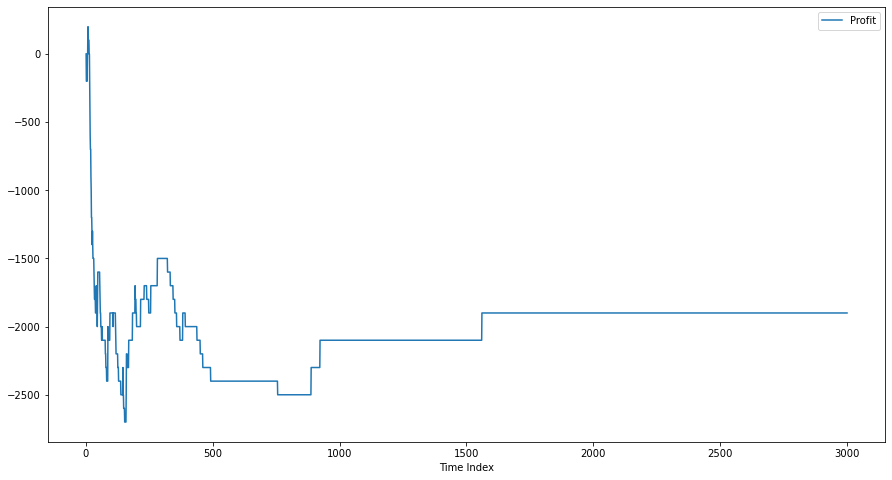

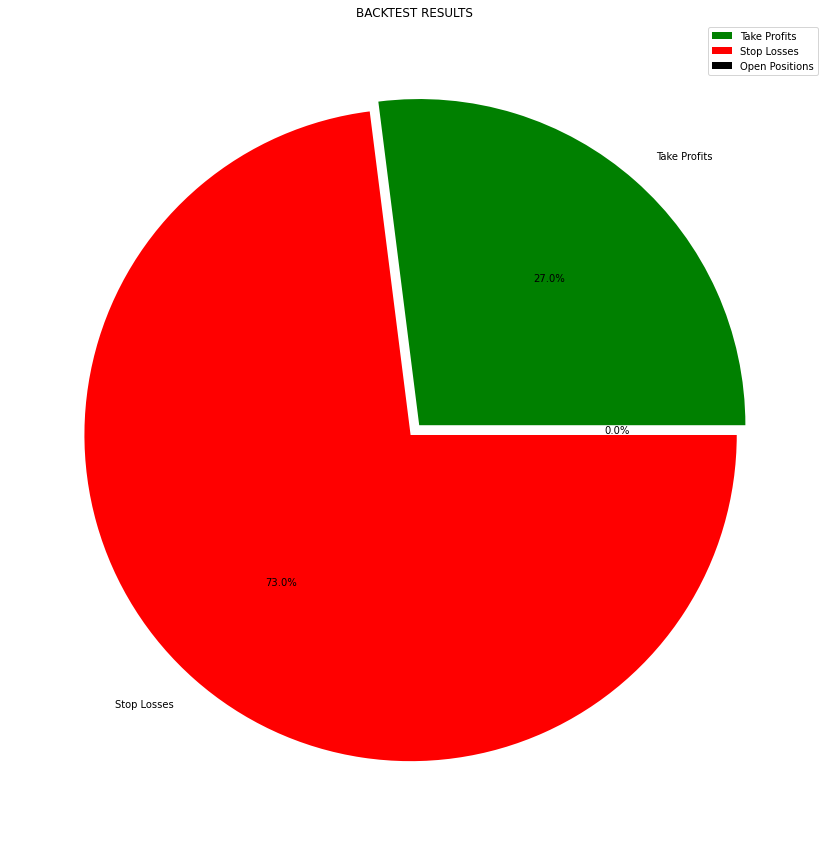

In [29]:
trade_status_df.plot("Time Index","Profit",figsize=(15,8))

last_tp =  float(trade_status_df['Take Profits'].tail(1) /number_of_occasions)
last_sl =  float(trade_status_df['Stop Losses'].tail(1) /number_of_occasions)
open_positions = 1-last_sl-last_tp

df = pd.DataFrame({'': [last_tp,last_sl,open_positions]},index=['Take Profits', 'Stop Losses', 'Open Positions'])
df.plot.pie(y= '', title="BACKTEST RESULTS", figsize=(15,15),autopct='%1.1f%%',colors = ['green', 'red','black'],
           explode=(0.02, 0.02, 0.02), shadow=False, startangle = 0)

In [30]:
# First to hit TP & SL Heatmap organised by earliest TP and earliest SL first

a = percentage_df.sum().sort_values(ascending=True)
b = pd.concat((a[a.lt(0)],a[a.gt(0)].sort_values(),a[a.eq(0)]))
percentage_df = percentage_df.reindex(columns=b.index)
percentage_df

Trades,41,47,90,76,53,28,86,40,84,32,...,37,44,45,7,15,96,89,85,54,66
Time Index,,,,,,,,,,,,,,,,,,,,,
1,-0.034197,-0.010171,0.000000,0.393465,-0.010689,0.000000,0.710088,-0.045884,0.026048,0.000000,...,-0.024694,-0.009188,0.013454,-0.062412,0.041876,0.038630,0.000000,-0.117959,0.053015,-0.096370
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.085492,0.010171,0.058829,0.136857,0.032068,-0.014797,-0.342801,-0.009177,0.208388,0.012925,...,0.000000,-0.018376,-0.013454,-0.078015,0.020938,0.025753,0.065232,0.029490,-0.013254,0.053539
4,0.170984,-0.172905,0.078439,0.179625,0.032068,0.029595,-0.734574,-0.036707,0.208388,-0.051700,...,-0.024694,0.000000,-0.040361,-0.062412,0.041876,-0.077260,0.146771,0.186769,0.039761,0.085662
5,0.247927,-0.233930,-0.009805,0.239500,0.117584,0.014797,-1.028404,-0.064238,0.208388,-0.038775,...,-0.024694,0.009188,0.080721,0.015603,0.062814,-0.180273,0.195695,0.255578,0.013254,0.139201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,-14.738822,-11.665989,-5.167173,-14.549654,-12.282202,-9.914176,-2.595495,-9.534734,1.719198,-6.384904,...,6.679837,4.318265,9.847975,4.025589,3.371022,6.206541,13.111546,7.795144,6.083499,16.372203
2997,-14.653330,-11.686330,-5.235807,-14.438457,-12.431855,-9.914176,-2.522037,-9.387905,1.719198,-6.410754,...,6.741573,4.336641,9.942150,3.853955,3.329146,6.438321,13.160470,7.706675,5.950961,16.393618
2998,-14.507994,-11.767697,-5.353466,-14.429903,-12.506681,-9.884581,-2.448580,-9.534734,1.719198,-6.359054,...,6.655143,4.364204,9.901789,3.838352,3.308208,6.618594,13.062622,7.755824,5.844930,16.382910


In [31]:
from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform

In [32]:
# reshape to 1D array or rates with a month and year for each row.
heatmap_df = pd.DataFrame(percentage_df.stack(), columns=['rate']).reset_index()
heatmap_df

,Time Index,Trades,rate
0,1,41,-0.034197
1,1,47,-0.010171
2,1,90,0.000000
3,1,76,0.393465
4,1,53,-0.010689
...,...,...,...
299995,3000,96,6.399691
299996,3000,89,12.964775
299997,3000,85,7.804974
299998,3000,54,5.937707


In [33]:
# Winners and Losers Heatmap

cond1 = (price_array > take_profit)
cond2 = (price_array < stop_loss)
s = pd.DataFrame(np.select([cond1,cond2],[1,-1],default = 0))

close_position_array = s.mask(s.isin([1,-1]).cumsum()>0).fillna(s.where(s.isin([1,-1]).cumsum()>0).bfill().iloc[0]).values
close_position_array

close_position_df = pd.DataFrame(close_position_array  , columns=list(range(1,len(entry_times)+1)))
close_position_df['Time Index'] = list(range(1,len(price_array)+1))
close_position_df["Time Index"] = close_position_df["Time Index"].astype(str)
close_position_df = close_position_df.set_index('Time Index')
close_position_df.columns.name = 'Trades'
close_position_df.columns = close_position_df.columns.astype(str)
close_position_df.index = close_position_df.index.astype(str)

close_position_df

Trades,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Time Index,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
2997,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
2998,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


In [34]:
# Winners and Losers Heatmap organised by earliest TP and earliest SL first

a = close_position_df.sum().sort_values(ascending=False)
b = pd.concat((a[a.gt(0)],a[a.lt(0)].sort_values(),a[a.eq(0)]))
close_position_df = close_position_df.reindex(columns=b.index)
close_position_df

Trades,91,85,98,27,15,10,30,31,25,35,...,51,80,6,55,49,63,7,20,100,29
Time Index,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [35]:
heatmap_df2 = pd.DataFrame(close_position_df.stack(), columns=['rate']).reset_index()
heatmap_df2

,Time Index,Trades,rate
0,1,91,0.0
1,1,85,0.0
2,1,98,0.0
3,1,27,0.0
4,1,15,0.0
...,...,...,...
299995,3000,63,-1.0
299996,3000,7,-1.0
299997,3000,20,-1.0
299998,3000,100,-1.0


In [36]:
output_file("jerry.html")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,poly_select,save,undo"

# create a new plot

Sample_Data = figure(tools=TOOLS, width=1300, x_axis_label='Time', y_axis_label='Profit',  plot_height=400, title= "Backtest Results")
Sample_Data.line(trade_status_df['Time Index'],trade_status_df['Profit'], line_width=1, color="navy", alpha=0.7)
Sample_Data.ygrid.grid_line_color = None
Sample_Data.ygrid.grid_line_color = None


###############################################################################################################

x = {
    'Take Profit': last_tp,
    'Stop Loss': last_sl,
    'Open Positions': open_positions
}

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'result'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = "mediumaquamarine","lightsalmon","black"

pie = figure(plot_height=400, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@result: @value", x_range=(-0.5, 1.0))

pie.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='result', source=data)

pie.axis.axis_label=None
pie.axis.visible=False
pie.grid.grid_line_color = None
#################################################################################################################

source = ColumnDataSource(heatmap_df)
source

# this is the colormap from the original NYTimes plot
colors = ['red','crimson','indianred', 'salmon', 'lightsalmon', 'grey', 'mediumaquamarine', 'palegreen', 'springgreen', 'limegreen', 'forestgreen']

mapper = LinearColorMapper(palette=colors, low=-10, high=10)

bibb = figure(plot_width=1300, plot_height=450, title="% Return After Entering A Flag Trade",
            y_range =list(reversed(percentage_df.index)), x_range=list((percentage_df.columns)),
           toolbar_location=None, tools=TOOLS, x_axis_location="above")

bibb.rect(y="Time Index", x="Trades", width= 1, height= 1, source=source,
       line_color=None, fill_color=transform('rate', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

bibb.add_layout(color_bar, 'right')

bibb.axis.axis_line_color = None
bibb.axis.major_tick_line_color = None
bibb.axis.major_label_text_font_size = "7px"
bibb.axis.major_label_standoff = 3
bibb.xaxis.major_label_orientation = 0.01

renderer = bibb.multi_line([[1, 3000+1]], [[0, 0]], line_width=3, alpha=0.4, color='navy')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
bibb.add_tools(draw_tool)
bibb.toolbar.active_drag = draw_tool

########################################################################################################################

source = ColumnDataSource(heatmap_df2)
source

# this is the colormap from the original NYTimes plot
colors = ['lightsalmon','grey', 'mediumaquamarine']

mapper = LinearColorMapper(palette=colors, low=-1, high=1)

gibb = figure(plot_width=600, plot_height=450, title="Duration of Open Trade",
          y_range =list(close_position_df.index), x_range=list(reversed(close_position_df.columns)),
           toolbar_location=None, tools=TOOLS, x_axis_location="above")

gibb.rect(y="Time Index", x="Trades", width= 1, height= 1, source=source,
       line_color=None, fill_color=transform('rate', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=2),
                     formatter=PrintfTickFormatter(format="%d"))

gibb.add_layout(color_bar, 'right')

gibb.axis.axis_line_color = None
gibb.axis.major_tick_line_color = None
gibb.axis.major_label_text_font_size = "7px"
gibb.axis.major_label_standoff = 3
gibb.xaxis.major_label_orientation = 0.01

renderer = gibb.multi_line([[1, 3000+1]], [[0, 0]], line_width=3, alpha=0.4, color='navy')
draw_tool = FreehandDrawTool(renderers=[renderer], num_objects=10)
gibb.add_tools(draw_tool)
gibb.toolbar.active_drag = draw_tool
# put all the plots in a grid layout
p = gridplot( [[Sample_Data,pie],[bibb,gibb,]] )

# show the results
show(p)

In [37]:
# You can see a stop run for trade 21, initially goes light red before shooting and going deep green!
# checking time df for the 21st collumn: 171244 25th of Jan 2020, correlation 0.85
# This would have hit stop loss for settings 
# R = 2 & Target = 1.01
# If there was to spot these stope hunts using rate of change data

In [38]:
# KEY INPUTS!!!:

# DATA:
# number_of_occasions = 3000         # Number of rows (minutes after detecting correlation)\

# backtest_period                    # length of time we simulate for 
# entry_times = filtered_time[0:31]  # Initial column values (the individual occasions of which we are backtesting)

#PARAMETERS
# R = 2                     # Risk to Reward ratio (2 = risk 1 to gain 2)
# Target = 1.01             # Our take profit as a % from entry
# entry = price_array[0]    # We may not want to enter the trade immediately as it may take out lows first

# account_size = 10000       # Portfolio size that we trade with
# percentage_risk            # % of account risked per trade

In [39]:
# KEY INPUTS!!!:

#for sample set 
sample_start
sample_finish

#for plotting comparisons
leap
dataset1end
dataset2end
dataset3end
dataset4end
dataset5end
dataset6end
dataset7end
dataset8end
future_projection

700

In [40]:
# a = percentage_df.sum().sort_values(ascending=False)
# b = pd.concat((a[a.gt(0)],a[a.lt(0)].sort_values(),a[a.eq(0)]))
# percentage_df = percentage_df.reindex(columns=b.index)
# percentage_df